Summary of all the good estimates we got:

|variables | #variables | #calculation | R_square | standard error|
|:---|---|---|---|---|
|S_MAT + P_MAP + TX_Lat + TX_Long|4|4|0.835|145|
|S_MAT + I(S_MAT^2) + P_MAP + TX_Lat + TX_Long|4|5|0.841|143|
|P_MCMT + I(P_MCMT^2) + S_MAP + I(S_MAP^2) + TX_Lat + I(TX_Lat^2) + TX_Long|4|7|0.871|129|
|P_MCMT + I(P_MCMT^2) + S_MAP + I(S_MAP^2) + I(TX_Lat^2) + TX_Long|4|6|0.871|129|
|P_MCMT + I(P_MCMT^2) +  S_MAP + I(S_MAP^2)|2|4|0.843|142|
|TX_MCMT + I(TX_MCMT^2) +  S_MAT + I(S_MAT^2)|2|4|0.841|143|
|TX_MCMT + I(TX_MCMT^2) +  P_MAT + I(P_MAT^2)|2|4|0.830|148|
|TX_MAT + I(TX_MAT^2) + S_MCMT + I(S_MCMT^2)|2|4|0.830|148|


In [21]:
library(tidyverse)
tree_data <- read_csv("Sx.htdata.csv")
 
library(repr)
sxData <- tree_data |>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Latitude - P_Latitude,
    TX_Long = S_Longitude - P_Longitude,
    TX_Elev = S_Elevation - P_Elevation
) 
head(sxData)

Rows: 3240 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SITE
dbl (19): PROV, BLOCK, TREE, S_MAT, S_MCMT, S_MAP, S_MSP, S_Latitude, S_Long...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SITE,PROV,BLOCK,TREE,S_MAT,S_MCMT,S_MAP,S_MSP,S_Latitude,S_Longitude,⋯,P_Longitude,Height,live,TX_MAP,TX_MSP,TX_MCMT,TX_MAT,TX_Lat,TX_Long,TX_Elev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MID,1,4,6,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,853.3361,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,3,4,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,827.0951,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,3,9,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,804.8595,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,9,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,745.6832,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,5,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,832.1914,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,1,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,838.4129,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92


In [22]:
model.1 <- lm(Height ~ 
              S_MAT + 
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8358   standard error: 145.1

model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8409   standard error: 14

model.3 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long,
              data = sxData)
# R-squared: 0.8709   standard error: 128.7

model.4 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              I(TX_Lat^2) +
              TX_Long,
              data = sxData)
# R-squared: 0.8708   standard error: 128.8

model.5 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) + 
              S_MAP + I(S_MAP^2), 
              data = sxData)
# R-squared: 0.8428   standard error: 142

model.6 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              S_MAT + I(S_MAT^2), 
              data = sxData)
# R-squared: 0.8411   standard error: 142.8

model.7 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              P_MAT + I(P_MAT^2), 
              data = sxData)
# R-squared: 0.8299   standard error: 147.7

model.8 <- lm(Height ~ 
              TX_MAT + I(TX_MAT^2) + 
              S_MCMT + I(S_MCMT^2), 
              data = sxData)
# R-squared: 0.8308   standard error: 147.4

In [13]:
fcData <- read_csv("Cmdata.csv") |> 
transmute(SITE = Location,
         S_MCMT = MCMT,
         S_MAT = MAT,
         S_MAP = MAP,
         S_MSP = MSP,
         S_Lat = Lat,
         S_Long = long,
         S_Elev = elev,
         period = period)

# fcData

#nearest to m: 40,  s: 63, n: 34 (PROV)
sxData2 <- subset(sxData, PROV %in% c(34, 40, 63))
sxData2 <- unique(subset(sxData2, select = c(PROV, P_MAT, P_MCMT, P_MAP, P_MSP, P_Latitude, P_Longitude, P_Elevation)))
fcdat2 <- merge(fcData, sxData2)

fcdat2 <- fcdat2|>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Lat - P_Latitude,
    TX_Long = S_Long- P_Longitude,
    TX_Elev = S_Elev - P_Elevation)

head(fcdat2,2)

pred_height <- predict(model.5, fcdat2)
pred_table <- tibble (fcdat2$PROV, fcdat2$SITE, fcdat2$period, pred_height) |>
transmute(PROV = fcdat2$PROV, 
          SITE = fcdat2$SITE, 
          period = fcdat2$period, 
          height = pred_height)

pred_table

Rows: 12 Columns: 270
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): Location, period
dbl (268): Lat, long, elev, MAT, MWMT, MCMT, TD, MAP, MSP, AHM, SHM, DD_0, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,SITE,S_MCMT,S_MAT,S_MAP,S_MSP,S_Lat,S_Long,S_Elev,period,PROV,⋯,P_Latitude,P_Longitude,P_Elevation,TX_MAP,TX_MSP,TX_MCMT,TX_MAT,TX_Lat,TX_Long,TX_Elev
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,-9.0,3.4,673,245,55,-125,1000,8GCMs_ensemble_ssp126_2071-2100.gcm,40,⋯,54.69117,-127.4027,1005,-50,15,0.3,1.8,0.3088276,2.40266,-5
2,M,-7.9,4.4,699,253,55,-125,1000,8GCMs_ensemble_ssp245_2071-2100.gcm,40,⋯,54.69117,-127.4027,1005,-24,23,1.4,2.8,0.3088276,2.40266,-5


PROV,SITE,period,height
<dbl>,<chr>,<chr>,<dbl>
40,M,8GCMs_ensemble_ssp126_2071-2100.gcm,1025.6357
40,M,8GCMs_ensemble_ssp245_2071-2100.gcm,1012.7811
40,M,8GCMs_ensemble_ssp370_2071-2100.gcm,1012.7811
40,M,8GCMs_ensemble_ssp585_2071-2100.gcm,959.1557
40,S,8GCMs_ensemble_ssp585_2071-2100.gcm,523.3477
40,S,8GCMs_ensemble_ssp370_2071-2100.gcm,617.7206
40,S,8GCMs_ensemble_ssp245_2071-2100.gcm,541.7900
40,S,8GCMs_ensemble_ssp126_2071-2100.gcm,676.9106
40,N,8GCMs_ensemble_ssp126_2071-2100.gcm,528.3025


In [20]:
pred_table2 <- pred_table |>
separate(col = period, into = c("del", "ssp"), sep = "_ssp") |>
select(-del) |>
separate(col = ssp, into = c("ssp", "del"), sep = "_") |>
select(-del)

# x_factor <- as.factor(x)
# levels(x_factor) <- c("R", "G", "B")

# Check the renamed factor levels
# levels(x_factor)

final_pred <- pred_table2 |>
mutate(PROV_area = factor(PROV, levels = c("34", "40", "63"), labels = c("N", "M", "S"))) #|>
#transmute(PROV = PROV, SITE= SITE, SSP = ssp, Height = height)
final_pred

PROV,SITE,ssp,height,PROV_area
<dbl>,<chr>,<chr>,<dbl>,<fct>
40,M,126,1025.6357,M
40,M,245,1012.7811,M
40,M,370,1012.7811,M
40,M,585,959.1557,M
40,S,585,523.3477,M
40,S,370,617.7206,M
40,S,245,541.7900,M
40,S,126,676.9106,M
40,N,126,528.3025,M


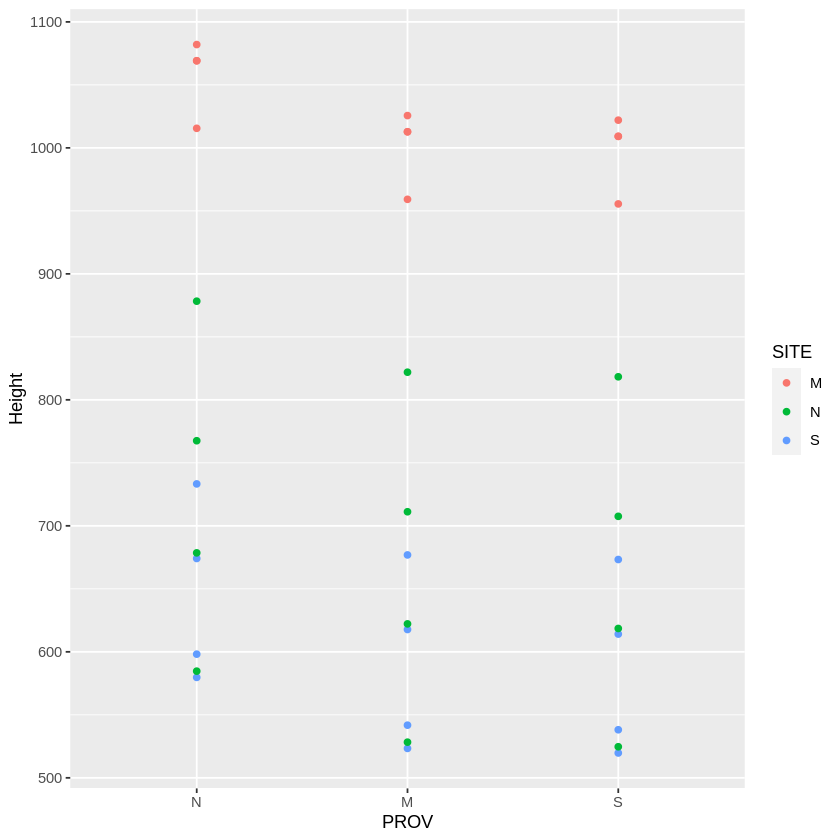

In [112]:
final_pred |>
ggplot(aes(x=PROV, y=Height, color = SITE)) + geom_point()

In [30]:
# sxData |>
# mutate(n_dist = sqrt(((P_Latitude-60)^2 + (P_Longitude+130)^2))) |>
# arrange(n_dist) |>
# slice(1:5)

#nearest to m: prov 40,  s: 63, n: 34